# ベースラインの構築をする

# 準備

In [1]:
# ドライブのインポート
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 必要なライブラリのインポート
# srcに書くのやめた
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#最大表示行数の指定
pd.set_option('display.max_columns', 100)

In [4]:
# 訓練データとテストデータの読み込み
df_train = pd.read_csv('/content/drive/MyDrive/analysis/Signate_RealEstatePrices/data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/analysis/Signate_RealEstatePrices/data/test.csv')

/tmp/ipython-input-173157445.py:2: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('/content/drive/MyDrive/analysis/Signate_RealEstatePrices/data/train.csv')
/tmp/ipython-input-173157445.py:3: DtypeWarning: Columns (46,55,56,63,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('/content/drive/MyDrive/analysis/Signate_RealEstatePrices/data/test.csv')


# データの概要確認・前処理

In [5]:
# データサイズの確認
print(df_train.shape)
print(df_test.shape)

(363924, 149)
(112437, 149)


In [6]:
df_train.head()

,target_ym,money_room,building_id,building_status,building_create_date,building_modify_date,building_type,building_name,building_name_ruby,homes_building_name,homes_building_name_ruby,unit_count,full_address,lon,lat,building_structure,total_floor_area,building_area,floor_count,basement_floor_count,year_built,building_land_area,land_area_all,unit_area_min,unit_area_max,building_land_chimoku,land_youto,land_toshi,land_chisei,land_area_kind,land_setback_flg,land_setback,land_kenpei,land_youseki,land_road_cond,land_seigen,building_area_kind,management_form,management_association_flg,reform_exterior,reform_exterior_other,reform_exterior_date,reform_common_area,reform_common_area_date,building_tag_id,unit_id,unit_name,name_ruby,room_floor,balcony_area,...,land_shidou_b,land_mochibun_a,land_mochibun_b,house_area,flg_new,house_kanrinin,room_kaisuu,snapshot_window_angle,madori_number_all,madori_kind_all,money_kyoueki,money_kyoueki_tax,money_rimawari_now,money_shuuzen,money_shuuzenkikin,money_sonota_str1,money_sonota1,money_sonota_str2,money_sonota2,money_sonota_str3,money_sonota3,parking_money,parking_money_tax,parking_kubun,parking_distance,parking_number,parking_memo,genkyo_code,usable_status,usable_date,school_ele_name,school_ele_distance,school_ele_code,school_jun_name,school_jun_distance,school_jun_code,convenience_distance,super_distance,hospital_distance,park_distance,drugstore_distance,bank_distance,shopping_street_distance,est_other_name,est_other_distance,statuses,parking_keiyaku,money_hoshou_company,free_rent_duration,free_rent_gen_timing
0,201901,13980000,206271,1,2014-06-27 21:09:41,2019-01-24 00:10:08,4,NaN,NaN,桑名市東正和台7丁目10-11,NaN,NaN,三重県桑名市東正和台7丁目10-11,136.637467,35.047688,1.0,106.820000,NaN,2.0,NaN,199204.0,188.490005,188.490005,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,50.0,80.0,NaN,NaN,1.0,NaN,NaN,NaN,外壁塗装,201807.0,NaN,NaN,210202/210301/210101,262186,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,106.82,0.0,NaN,NaN,NaN,4,50,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,2.0,NaN,2.0,1,NaN,桑部小学校,2000.0,NaN,正和中学校,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210101/220701/220601/230401/310501/210301/210202,NaN,NaN,NaN,NaN
1,201901,24480000,83315,1,2014-06-27 21:09:43,2019-04-03 00:10:08,4,NaN,NaN,桑名市松ノ木5丁目,NaN,1.0,三重県桑名市松ノ木5丁目14-8,136.639936,35.074625,10.0,NaN,NaN,2.0,NaN,198108.0,290.519989,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.2,50.0,80.0,1.0,NaN,NaN,NaN,NaN,2,外壁塗装,201706.0,NaN,NaN,330501/210301/210101/210201,35726,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,134.04,0.0,NaN,NaN,NaN,4,50,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,3.0,NaN,2.0,1,NaN,大山田南小学校,350.0,NaN,陵成中学校,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210101/220701/220601/220801/230601/250201/2103...,NaN,NaN,NaN,NaN
2,201901,24480000,140201,1,2014-06-27 21:09:43,2020-06-06 00:10:11,4,NaN,NaN,桑名市松ノ木七丁目,NaN,1.0,三重県桑名市松ノ木7丁目16-10,136.644708,35.072248,1.0,NaN,NaN,2.0,NaN,199506.0,235.649994,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.2,50.0,80.0,2.0,NaN,NaN,NaN,NaN,2,外壁塗装,201804.0,NaN,NaN,210201/330501/334101/210101/210301/340301,116820,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,114.59,0.0,NaN,NaN,NaN,4,50,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,2.0,NaN,2.0,1,NaN,大山田南小学校,850.0,NaN,陵成中学校,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210101/220701/220601/230401/220801/310501/2306...,NaN,NaN,NaN,NaN
3,201901,16300000,216551,1,2014-06-27 19:24:11,2019-04-26 00:10:08,4,NaN,NaN,中古戸建 知多市八幡字荒井,NaN,NaN,愛知県知多市八幡荒井105-1,136.875602,35.003174,1.0,106.809998,NaN,2.0,NaN,200203.0,169.729996,NaN,NaN,NaN,1.0,12.0,1.0,NaN,1.0,1.0,NaN,60.0,200.0,NaN,準防火地域、文化財保護法,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210101/210401/210301,281648,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,106.81,0.0,NaN,NaN,NaN,3,50,0.0,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,3.0,NaN,1.0,2,NaN,八幡小学校,1400.0,NaN,八幡中学校,1400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,コンビニ,300.0,210101/290901/230401/210301/210401,NaN,NaN,NaN,NaN
4,201901,18800000,134968,1,2014-06-27 19:24:12,2025-09-15 02:49:23,1,ロイヤル知多寺本,NaN,ロイヤル知多寺本,NaN,32.0

In [7]:
df_test.head()

,id,target_ym,building_id,building_status,building_create_date,building_modify_date,building_type,building_name,building_name_ruby,homes_building_name,homes_building_name_ruby,unit_count,full_address,lon,lat,building_structure,total_floor_area,building_area,floor_count,basement_floor_count,year_built,building_land_area,land_area_all,unit_area_min,unit_area_max,building_land_chimoku,land_youto,land_toshi,land_chisei,land_area_kind,land_setback_flg,land_setback,land_kenpei,land_youseki,land_road_cond,land_seigen,building_area_kind,management_form,management_association_flg,reform_exterior,reform_exterior_other,reform_exterior_date,reform_common_area,reform_common_area_date,building_tag_id,unit_id,unit_name,name_ruby,room_floor,balcony_area,...,land_shidou_b,land_mochibun_a,land_mochibun_b,house_area,flg_new,house_kanrinin,room_kaisuu,snapshot_window_angle,madori_number_all,madori_kind_all,money_kyoueki,money_kyoueki_tax,money_rimawari_now,money_shuuzen,money_shuuzenkikin,money_sonota_str1,money_sonota1,money_sonota_str2,money_sonota2,money_sonota_str3,money_sonota3,parking_money,parking_money_tax,parking_kubun,parking_distance,parking_number,parking_memo,genkyo_code,usable_status,usable_date,school_ele_name,school_ele_distance,school_ele_code,school_jun_name,school_jun_distance,school_jun_code,convenience_distance,super_distance,hospital_distance,park_distance,drugstore_distance,bank_distance,shopping_street_distance,est_other_name,est_other_distance,statuses,parking_keiyaku,money_hoshou_company,free_rent_duration,free_rent_gen_timing
0,0,202301,129053,1,2014-06-27 21:09:41,2025-10-02 00:45:07,1,スペリア桑名三番館,NaN,スペリア桑名三番館,スペリアクワナサンバンカン,151.0,三重県桑名市大字福島969-1,136.688153,35.072193,5.0,NaN,NaN,14.0,NaN,199510.0,18093.500000,NaN,NaN,NaN,NaN,7.0,1.0,NaN,1.0,NaN,NaN,60.0,200.0,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,210201/321001/210101/320101/210301,149752,403,NaN,4.0,9.81,...,NaN,3015961.0,7019.0,70,0,3.0,4.0,5.0,3,50,8400.0,2.0,NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5250.0,2.0,1.0,0.0,1.0,NaN,2.0,1,NaN,修徳小学校,410.0,NaN,桑名市立光風中学校,1387.0,NaN,474.0,369.0,NaN,NaN,118.0,NaN,1077.0,桑名東方簡易郵便局,904.0,253501/220301/210101/340102/290401/220701/2206...,NaN,NaN,NaN,NaN
1,1,202301,47690,1,2014-06-27 21:09:42,2023-02-11 00:10:05,4,NaN,NaN,桑名市松並町二丁目 ミサワホーム中古住宅,NaN,NaN,三重県桑名市松並町2丁目6-11,136.673603,35.066061,1.0,171.820007,NaN,2.0,NaN,199206.0,197.529999,197.529999,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,60.0,100.0,1.0,※新型コロナウイルス感染症対策として、テレワークを実施中のため、固定電話がつながりにくくなっ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210201/210101/210301,56974,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,171,0,NaN,NaN,NaN,6,50,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,2.0,2,NaN,桑名市立大成小学校,1030.0,NaN,桑名市立明正中学校,1361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210101/290501/210201/210301/250201,NaN,NaN,NaN,NaN
2,2,202301,130646,1,2014-06-27 19:24:11,2025-06-28 00:45:08,4,NaN,NaN,知多市南粕谷4丁目 戸建て,NaN,NaN,愛知県知多市南粕谷4丁目177,136.854324,34.937964,10.0,92.129997,NaN,2.0,NaN,197511.0,223.309998,223.309998,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,60.0,100.0,1.0,大野町駅より車で6分 バス停「ヤマナカ粕谷台店前」より徒歩5分(350m) ※司法書士は売...,NaN,NaN,NaN,2/1,NaN,202307.0,NaN,NaN,343401/323401/210101/210202/210301,219944,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,78,0,NaN,NaN,5.0,3,50,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,3.0,NaN,2.0,3,202302.0,知多市立南粕谷小学校,750.0,NaN,知多市立旭南中学校,900.0,NaN,650.0,300.0,NaN,210.0,NaN,NaN,NaN,NaN,NaN,230203/210101/220401/220701/290601/220601/2901...,NaN,NaN,NaN,NaN
3,3,202301,52506,1,2014-06-27 19:24:12,2023-03-05 00:10:05,4,NaN,NaN,NaN,NaN,1.0,愛知県知多市八幡荒古後101-3,136.877587,35.003429,1.0,NaN,NaN,1.0,NaN,201603.0,100.589996,NaN,NaN,NaN,5.0,3.0,1.0,NaN,1.0,NaN,NaN,70.0,200.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174371,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,93,0,NaN,NaN,5.0,4,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,1,NaN,知多市立八幡小学校,1400.0,NaN,知多市立八幡中学校,1800.0,NaN,460.0,1460.0,NaN,NaN,1250.0,NaN,NaN,NaN,NaN,230501/210101/220401/253401/290401/253501/2207...,NaN,NaN,NaN,NaN
4,

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363924 entries, 0 to 363923
Columns: 149 entries, target_ym to free_rent_gen_timing
dtypes: float64(92), int64(13), object(44)
memory usage: 413.7+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112437 entries, 0 to 112436
Columns: 149 entries, id to free_rent_gen_timing
dtypes: float64(89), int64(15), object(45)
memory usage: 127.8+ MB


上記から、


*   訓練データのmoney_roomが目的変数
*   テストデータのid列は識別子（sample_submit.csvも見たらわかる）
*   その他の列は両方のデータセットで同じ


In [10]:
train_money_room = df_train.money_room.values
test_id = df_test['id']
df_train.drop(['money_room'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

# EDA

In [11]:
df_train.describe()

,target_ym,building_id,building_status,building_type,building_name_ruby,unit_count,lon,lat,building_structure,total_floor_area,building_area,floor_count,basement_floor_count,year_built,building_land_area,land_area_all,unit_area_min,unit_area_max,building_land_chimoku,land_youto,land_toshi,land_chisei,land_area_kind,land_setback_flg,land_setback,land_kenpei,land_youseki,land_road_cond,building_area_kind,management_form,management_association_flg,reform_exterior_date,reform_common_area_date,unit_id,name_ruby,room_floor,balcony_area,dwelling_unit_window_angle,room_count,unit_area,floor_plan_code,reform_date,reform_wet_area_date,reform_interior_date,bukken_id,bukken_type,flg_investment,empty_number,post1,post2,...,bus_time1,walk_distance1,bus_time2,walk_distance2,traffic_car,snapshot_land_area,snapshot_land_shidou,land_shidou_a,land_shidou_b,land_mochibun_a,land_mochibun_b,house_area,flg_new,house_kanrinin,room_kaisuu,snapshot_window_angle,madori_number_all,madori_kind_all,money_kyoueki,money_kyoueki_tax,money_rimawari_now,money_shuuzen,money_shuuzenkikin,money_sonota1,money_sonota2,money_sonota3,parking_money,parking_money_tax,parking_kubun,parking_distance,parking_number,genkyo_code,usable_status,usable_date,school_ele_distance,school_ele_code,school_jun_distance,school_jun_code,convenience_distance,super_distance,hospital_distance,park_distance,drugstore_distance,bank_distance,shopping_street_distance,est_other_distance,parking_keiyaku,money_hoshou_company,free_rent_duration,free_rent_gen_timing
count,363924.000000,363924.000000,363924.000000,363924.000000,0.0,227921.000000,363924.000000,363924.000000,348475.000000,113500.000000,7.026000e+03,362627.000000,30360.000000,349238.000000,1.764870e+05,6.376900e+04,126462.000000,126462.000000,171916.000000,320052.000000,276624.000000,122684.000000,169998.000000,135152.000000,78805.000000,261316.000000,261402.000000,143079.000000,251215.000000,195614.000000,121610.000000,17972.000000,2303.000000,363924.000000,0.0,198452.000000,162768.000000,241084.000000,316862.000000,316871.000000,316859.000000,1268.000000,83673.000000,90266.000000,363924.000000,363924.000000,186971.000000,113109.000000,355753.000000,355752.000000,...,47913.000000,356199.000000,29014.000000,212048.000000,4.00000,1.736780e+05,55652.000000,1.345300e+04,1.387700e+04,3.126300e+04,3.128200e+04,363924.000000,363922.000000,197991.000000,208752.000000,245767.000000,363924.000000,363924.000000,2.294230e+05,306326.000000,7198.000000,2.392130e+05,5.684000e+03,5.126600e+04,1.028400e+04,3.650000e+03,213297.000000,219176.000000,266932.000000,54685.000000,111265.000000,356957.000000,363924.000000,14671.000000,239924.000000,0.0,228034.000000,0.0,170830.000000,184561.000000,95749.000000,93218.000000,106404.000000,73316.000000,33608.000000,85418.000000,7595.000000,0.0,0.0,0.0
mean,202054.908409,108890.808545,1.278827,41.944411,NaN,82.390403,137.461207,35.300902,3.231256,345.074620,1.686961e+04,6.117669,1.282675,199347.544798,1.250772e+03,2.777439e+03,53.919025,70.202823,1.174806,13.323260,1.168937,1.270247,1.033936,1.044986,0.491509,49.051968,161.422889,2.032744,1.085309,2.823131,1.881334,201881.632595,201764.112896,161804.747390,NaN,5.202754,10.119539,4.833469,3.232246,88.123727,368.902919,201448.588328,201954.391476,201960.337635,197019.847938,1256.575681,0.020870,1.118152,432.395207,846.649745,...,11.486987,1017.114531,11.034811,1272.814410,7.50000,7.161854e+02,30.680736,2.419141e+03,3.402142e+02,4.453307e+05,9.780841e+03,90.369974,0.003493,2.304989,5.052891,4.843738,3.215479,46.193400,1.003435e+04,2.494023,6.153687,1.036925e+04,1.028274e+05,4.965263e+03,5.842382e+03,5.894741e+03,4240.675115,2.463477,1.536878,9.142068,1.978996,1.796463,1.724627,202079.371209,833.155858,NaN,1228.646868,NaN,505.684324,750.465136,1081.188054,840.943659,788.271559,806.505238,1355.826500,864.873235,1.546412,NaN,NaN,NaN
std,109.247818,62799.636860,1.467270,194.578871,NaN,132.580822,2.979387,1.625129,2.072058,6043.683005,5.033592e+05,6.205453,1.417332,1440.

In [12]:
df_test.describe()

,target_ym,building_id,building_status,building_type,building_name_ruby,unit_count,lon,lat,building_structure,total_floor_area,building_area,floor_count,basement_floor_count,year_built,building_land_area,land_area_all,unit_area_min,unit_area_max,building_land_chimoku,land_youto,land_toshi,land_chisei,land_area_kind,land_setback_flg,land_setback,land_kenpei,land_youseki,land_road_cond,building_area_kind,management_form,management_association_flg,reform_exterior_date,reform_common_area_date,unit_id,name_ruby,room_floor,balcony_area,dwelling_unit_window_angle,room_count,unit_area,floor_plan_code,reform_date,reform_wet_area_date,reform_interior_date,bukken_id,bukken_type,flg_investment,empty_number,post1,post2,...,el,bus_time1,walk_distance1,bus_time2,walk_distance2,traffic_car,snapshot_land_area,snapshot_land_shidou,land_shidou_a,land_shidou_b,land_mochibun_a,land_mochibun_b,house_area,flg_new,house_kanrinin,room_kaisuu,snapshot_window_angle,madori_number_all,madori_kind_all,money_kyoueki,money_kyoueki_tax,money_rimawari_now,money_shuuzen,money_shuuzenkikin,money_sonota1,money_sonota2,money_sonota3,parking_money,parking_money_tax,parking_kubun,parking_distance,parking_number,genkyo_code,usable_status,usable_date,school_ele_distance,school_ele_code,school_jun_distance,school_jun_code,convenience_distance,super_distance,hospital_distance,park_distance,drugstore_distance,bank_distance,shopping_street_distance,est_other_distance,parking_keiyaku,free_rent_duration,free_rent_gen_timing
count,112437.000000,112437.000000,112437.000000,112437.000000,0.0,71893.000000,112437.000000,112437.000000,107428.000000,37566.000000,1955.000000,112075.000000,8922.000000,107618.000000,5.555900e+04,1.885600e+04,36510.000000,36510.000000,54573.000000,99021.000000,87122.000000,37701.000000,52962.000000,42525.000000,24681.000000,81148.000000,81131.000000,45912.000000,68741.000000,59034.000000,41758.000000,6614.000000,668.000000,112437.000000,0.0,59523.000000,53140.000000,78832.000000,101048.000000,101047.000000,101048.000000,304.000000,31138.000000,32790.000000,112437.000000,112437.000000,59657.000000,25860.000000,110544.000000,110544.000000,...,1.089510e+05,13121.000000,110112.000000,9164.000000,73506.000000,0.0,5.572700e+04,16267.000000,1.393000e+04,14060.000000,2.041600e+04,2.058400e+04,112437.000000,112437.000000,60091.000000,62781.000000,76555.000000,112437.000000,112437.000000,62883.000000,92797.000000,1598.000000,7.238400e+04,1.414000e+03,1.610900e+04,3.946000e+03,1422.000000,6.832900e+04,70433.000000,87403.000000,17951.000000,38120.000000,110781.000000,112437.000000,4959.000000,80647.000000,0.0,77100.000000,0.0,58412.000000,61567.000000,30226.000000,31420.000000,38304.000000,22570.000000,11158.000000,30979.000000,2114.000000,0.0,0.0
mean,202304.155954,108562.269822,1.167916,44.950852,NaN,79.960010,137.326992,35.292542,3.198803,269.911997,1443.403262,6.043212,1.258686,199373.707623,1.021591e+03,3.722857e+03,53.508310,69.655389,1.183222,12.842892,1.157538,1.247367,1.026982,1.047078,0.481496,49.936721,165.537883,2.054256,1.089233,2.834824,1.782796,202115.820835,201822.745509,161701.757437,NaN,5.240932,9.791468,4.836196,3.217817,88.640191,367.715838,201498.805921,202186.338590,202195.345197,197248.168459,1254.958546,0.030139,1.929505,441.107586,896.217949,...,4.943512e+08,12.118741,1037.820546,12.319184,1329.543779,NaN,3.668409e+02,34.344317,5.641023e+02,69.093457,2.571154e+05,3.892854e+03,86.726923,0.002472,2.325739,5.082796,4.855699,3.214351,46.541975,10283.445176,2.448344,5.297247,1.231637e+04,6.016839e+04,3.484170e+03,4.796400e+03,4222.724332,4.179540e+03,2.446183,1.569843,9.785583,2.041028,1.799695,1.742016,202307.988909,824.958374,NaN,1230.166122,NaN,498.419434,752.653954,1094.957983,823.215341,769.408521,821.959149,1408.690984,882.270344,1.609745,NaN,NaN
std,2.995957,62951.326315,1.146798,201.439241,NaN,138.118105,3.011793,1.681197,2.092509,4620.288688,5007.098218,5.532613,1.192631,1493.254615,2.189859e+04,5.588888e+04,19.223605,19.944437,1.1198

In [13]:
# 欠損値の確認
total_train = df_train.isnull().sum().sort_values(ascending = True)
percent_train = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = True)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total_train', 'Percent_train'])
missing_data_train.head(50)

,Total_train,Percent_train
target_ym,0,0.000000
building_id,0,0.000000
building_status,0,0.000000
building_create_date,0,0.000000
building_modify_date,0,0.000000
building_type,0,0.000000
lon,0,0.000000
full_address,0,0.000000
lat,0,0.000000
unit_id,0,0.000000


データを見るとめちゃくちゃ欠損値があるので実際使えるカラムはかなり少なさそう

/tmp/ipython-input-1088038518.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_money_room, bins=50, kde=True)


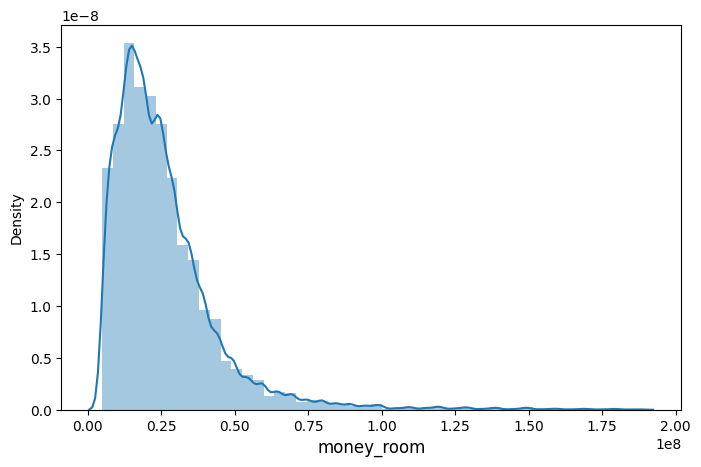

In [14]:
# 目的関数の確認
plt.figure(figsize=(8,5))
sns.distplot(train_money_room, bins=50, kde=True)
plt.xlabel('money_room', fontsize=12)
plt.show()

右に裾が長く伸びている

/tmp/ipython-input-1247893953.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(train_money_room), bins=50, kde=True)


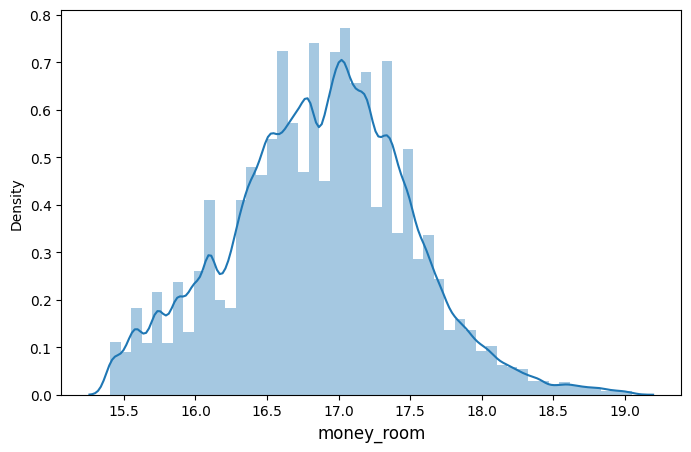

In [15]:
# money_roomの対数をプロットして裾消す
plt.figure(figsize=(8,5))
sns.distplot(np.log1p(train_money_room), bins=50, kde=True)
plt.xlabel('money_room', fontsize=12)
plt.show()

正規分布っぽい形になった

In [16]:
# 学習データとテストデータの掲載時期を比較する
df_train["target_ym"].max(), df_train["target_ym"].min()

(202207, 201901)

READMEによると

*   学習用データ：2019〜2022年の 1月または 7月
*   テストデータ：2023年の 1月または 7月

# データの前処理

In [17]:
# 先ほど確認した欠損データについて処理する
# 訓練データとテストデータにそれぞれ確認するのが面倒なので以下の関数で欠損のレコード数の合計と割合を確認する
def get_missing_report(df):
    missing_df = df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df = missing_df.loc[missing_df['missing_count']>0]
    missing_df["missing_ratio"] = missing_df["missing_count"]/len(df)

    return missing_df

In [18]:
train_missing = get_missing_report(df_train)
test_missing = get_missing_report(df_test)

In [19]:
train_missing

,column_name,missing_count,missing_ratio
6,building_name,164886,0.453078
7,building_name_ruby,363924,1.000000
8,homes_building_name,25994,0.071427
9,homes_building_name_ruby,260019,0.714487
10,unit_count,136003,0.373713
...,...,...,...
143,statuses,12590,0.034595
144,parking_keiyaku,356329,0.979130
145,money_hoshou_company,363924,1.000000
146,free_rent_duration,363924,1.000000


In [20]:
train_missing[train_missing.missing_ratio==1]

,column_name,missing_count,missing_ratio
7,building_name_ruby,363924,1.0
46,name_ruby,363924,1.0
130,school_ele_code,363924,1.0
133,school_jun_code,363924,1.0
145,money_hoshou_company,363924,1.0
146,free_rent_duration,363924,1.0
147,free_rent_gen_timing,363924,1.0


In [21]:
# 欠損率が100%のカラムを削除する
drop_cols = train_missing[train_missing['missing_ratio'] == 1]['column_name']
df_train.drop(drop_cols, axis=1, inplace=True)
df_test.drop(drop_cols, axis=1, inplace=True)

# 基本的な前処理

In [22]:
data_definition = pd.ExcelFile("/content/sample_data/data_definition.xlsx")

In [23]:
df_train[['addr1_1', 'addr1_2']].sample(3, random_state=2025)

,addr1_1,addr1_2
48171,11,201
16175,27,147
286956,1,106


In [24]:
# エクセルの4枚目のシートの読み込み
codes = pd.read_excel("/content/sample_data/data_definition.xlsx", sheet_name=data_definition.sheet_names[3])

In [25]:
# 読み込んだエクセルの列名を英語の表記に変更
codes.columns = ['No.', 'addr1_1', 'addr1_2', 'Prefecture name', 'City/town/village name']

In [26]:
codes = codes[['addr1_1', 'addr1_2', 'Prefecture name', 'City/town/village name']]

In [27]:
codes

,addr1_1,addr1_2,Prefecture name,City/town/village name
0,1,NaN,北海道,(北海道全体）
1,1,101.0,北海道,札幌市中央区
2,1,102.0,北海道,札幌市北区
3,1,103.0,北海道,札幌市東区
4,1,104.0,北海道,札幌市白石区
...,...,...,...,...
1948,47,361.0,沖縄県,島尻郡久米島町
1949,47,362.0,沖縄県,島尻郡八重瀬町
1950,47,375.0,沖縄県,宮古郡多良間村
1951,47,381.0,沖縄県,八重山郡竹富町


In [28]:
# 訓練データとテストデータに都道府県名のcodesを結合する
df_train = pd.merge(df_train, codes, on=['addr1_1', 'addr1_2'], how='inner')
df_test = pd.merge(df_test, codes, on=['addr1_1', 'addr1_2'], how='inner')

In [29]:
del codes

In [30]:
# いらん列を削除
df_train.drop(['addr1_1', 'addr1_2'], axis=1, inplace=True)
df_test.drop(['addr1_1', 'addr1_2'], axis=1, inplace=True)

In [31]:
df_train[['Prefecture name', 'City/town/village name']].head()

,Prefecture name,City/town/village name
0,三重県,桑名市
1,三重県,桑名市
2,三重県,桑名市
3,愛知県,知多市
4,愛知県,知多市


In [32]:
df_train.head()

,target_ym,building_id,building_status,building_create_date,building_modify_date,building_type,building_name,homes_building_name,homes_building_name_ruby,unit_count,full_address,lon,lat,building_structure,total_floor_area,building_area,floor_count,basement_floor_count,year_built,building_land_area,land_area_all,unit_area_min,unit_area_max,building_land_chimoku,land_youto,land_toshi,land_chisei,land_area_kind,land_setback_flg,land_setback,land_kenpei,land_youseki,land_road_cond,land_seigen,building_area_kind,management_form,management_association_flg,reform_exterior,reform_exterior_other,reform_exterior_date,reform_common_area,reform_common_area_date,building_tag_id,unit_id,unit_name,room_floor,balcony_area,dwelling_unit_window_angle,room_count,unit_area,...,snapshot_land_area,snapshot_land_shidou,land_shidou_a,land_shidou_b,land_mochibun_a,land_mochibun_b,house_area,flg_new,house_kanrinin,room_kaisuu,snapshot_window_angle,madori_number_all,madori_kind_all,money_kyoueki,money_kyoueki_tax,money_rimawari_now,money_shuuzen,money_shuuzenkikin,money_sonota_str1,money_sonota1,money_sonota_str2,money_sonota2,money_sonota_str3,money_sonota3,parking_money,parking_money_tax,parking_kubun,parking_distance,parking_number,parking_memo,genkyo_code,usable_status,usable_date,school_ele_name,school_ele_distance,school_jun_name,school_jun_distance,convenience_distance,super_distance,hospital_distance,park_distance,drugstore_distance,bank_distance,shopping_street_distance,est_other_name,est_other_distance,statuses,parking_keiyaku,Prefecture name,City/town/village name
0,201901,206271,1,2014-06-27 21:09:41,2019-01-24 00:10:08,4,NaN,桑名市東正和台7丁目10-11,NaN,NaN,三重県桑名市東正和台7丁目10-11,136.637467,35.047688,1.0,106.820000,NaN,2.0,NaN,199204.0,188.490005,188.490005,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,50.0,80.0,NaN,NaN,1.0,NaN,NaN,NaN,外壁塗装,201807.0,NaN,NaN,210202/210301/210101,262186,NaN,NaN,NaN,NaN,4.0,106.820000,...,188.49,NaN,NaN,NaN,NaN,NaN,106.82,0.0,NaN,NaN,NaN,4,50,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,2.0,NaN,2.0,1,NaN,桑部小学校,2000.0,正和中学校,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210101/220701/220601/230401/310501/210301/210202,NaN,三重県,桑名市
1,201901,83315,1,2014-06-27 21:09:43,2019-04-03 00:10:08,4,NaN,桑名市松ノ木5丁目,NaN,1.0,三重県桑名市松ノ木5丁目14-8,136.639936,35.074625,10.0,NaN,NaN,2.0,NaN,198108.0,290.519989,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.2,50.0,80.0,1.0,NaN,NaN,NaN,NaN,2,外壁塗装,201706.0,NaN,NaN,330501/210301/210101/210201,35726,NaN,NaN,NaN,5.0,4.0,134.039993,...,290.52,NaN,NaN,NaN,NaN,NaN,134.04,0.0,NaN,NaN,NaN,4,50,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,3.0,NaN,2.0,1,NaN,大山田南小学校,350.0,陵成中学校,1100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210101/220701/220601/220801/230601/250201/2103...,NaN,三重県,桑名市
2,201901,140201,1,2014-06-27 21:09:43,2020-06-06 00:10:11,4,NaN,桑名市松ノ木七丁目,NaN,1.0,三重県桑名市松ノ木7丁目16-10,136.644708,35.072248,1.0,NaN,NaN,2.0,NaN,199506.0,235.649994,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.2,50.0,80.0,2.0,NaN,NaN,NaN,NaN,2,外壁塗装,201804.0,NaN,NaN,210201/330501/334101/210101/210301/340301,116820,NaN,NaN,NaN,5.0,4.0,114.589996,...,235.65,NaN,NaN,NaN,NaN,NaN,114.59,0.0,NaN,NaN,NaN,4,50,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,2.0,NaN,2.0,1,NaN,大山田南小学校,850.0,陵成中学校,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210101/220701/220601/230401/220801/310501/2306...,NaN,三重県,桑名市
3,201901,216551,1,2014-06-27 19:24:11,2019-04-26 00:10:08,4,NaN,中古戸建 知多市八幡字荒井,NaN,NaN,愛知県知多市八幡荒井105-1,136.875602,35.003174,1.0,106.809998,NaN,2.0,NaN,200203.0,169.729996,NaN,NaN,NaN,1.0,12.0,1.0,NaN,1.0,1.0,NaN,60.0,200.0,NaN,準防火地域、文化財保護法,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210101/210401/210301,281648,NaN,NaN,NaN,5.0,2.0,106.809998,...,169.73,NaN,NaN,NaN,NaN,NaN,106.81,0.0,NaN,NaN,NaN,3,50,0.0,2.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,3.0,NaN,1.0,2,NaN,八幡小学校,1400.0,八幡中学校,1400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,コンビニ,300.0,210101/290901/230401/210301/210401,NaN,愛知県,知多市
4,201901,134968,1,2014-06-27 19:24:12,2025-09-15 02:49:23,1,ロイヤル知多寺本,ロイ

# 特徴量抽出

data_definition.xlsxのうち、以下のカラムにはスラッシュ区切りで複数の値が格納されている。
*   buiding_tag_id
*   unit_tag_id
*   reform_interior
*   reform_exterior
*   reform_wet_area
*   statuses



In [33]:
df_train["building_tag_id"].head()

,building_tag_id
0,210202/210301/210101
1,330501/210301/210101/210201
2,210201/330501/334101/210101/210301/340301
3,210101/210401/210301
4,210101/310101/320101/321001/321101/320901/2102...


In [34]:
tag_master = pd.read_excel("/content/sample_data/data_definition.xlsx", sheet_name=data_definition.sheet_names[2])

In [35]:
tag_master.head()

,No.,タグID,タグ内容,補足
0,1,210101,公営水道,棟に紐づくもの
1,2,210102,井戸,棟に紐づくもの
2,3,210199,水道その他,棟に紐づくもの
3,4,210201,都市ガス,棟に紐づくもの
4,5,210202,プロパンガス,棟に紐づくもの


In [36]:
tag_master = tag_master[['タグID', 'タグ内容']]
tag_master["タグID"] = tag_master["タグID"].astype("str")
tag_master.set_index('タグID', inplace=True)
tag_master = tag_master.to_dict()['タグ内容']

タグIDから内容へのマッピング辞書を作成

スラッシュの区切り列を展開する

In [37]:
slashed_columns = ["building_tag_id", "unit_tag_id",
                   "reform_interior",  "reform_exterior","reform_wet_area",
                  "statuses"]

スラッシュ区切りの値を持つ列を個別の列に変換する関数

メモリが重すぎたので以下のコードにした

In [38]:
import gc

# メモリを節約しながらスラッシュ区切りを展開する改良版
def get_slashed_tags(df):
    temp_dfs = []
    for col in slashed_columns:
        print(f"Processing {col}...")
        temp_df = df[col].str.get_dummies(sep="/").astype("int8")
        temp_df.rename(columns=tag_master, inplace=True)
        new_col_name = [f"{col} " + str(c) for c in temp_df.columns]
        temp_df.columns = new_col_name
        temp_dfs.append(temp_df)
        del temp_df
        gc.collect()
    print("Concatenating...")
    return pd.concat(temp_dfs, axis=1)

testデータとtrainデータでtrainのみに存在する列があった場合にエラーを吐く可能性があるので、結合、列を展開、再度分割する

まずtestデータとtrainデータをconcatし、そのあとスラッシュ区切りの列を取得する

In [39]:
# 1. データを結合する
df_combined = pd.concat([df_train, df_test])

# 3. 改良した関数を実行する
df_slashed = get_slashed_tags(df_combined)

# 4. 終わったら df_combined も不要なら消すとさらに安全
# del df_combined
# gc.collect()

Processing building_tag_id...
Processing unit_tag_id...
Processing reform_interior...
Processing reform_exterior...
Processing reform_wet_area...
Processing statuses...
Concatenating...


In [40]:
df_slashed.head()

,building_tag_id 楽器相談,building_tag_id 楽器不可,building_tag_id セキュリティ会社加入済み,building_tag_id 公営水道,building_tag_id 井戸,building_tag_id 水道その他,building_tag_id 都市ガス,building_tag_id プロパンガス,building_tag_id ガスその他,building_tag_id 下水,building_tag_id 浄化槽,building_tag_id 汲取,building_tag_id 排水その他,building_tag_id オール電化,building_tag_id 太陽光発電システム,building_tag_id 295101,building_tag_id 295401,building_tag_id 295501,building_tag_id オートロック,building_tag_id 防犯カメラ,building_tag_id 管理人常駐,building_tag_id 24時間有人管理,building_tag_id セキュリティ充実,building_tag_id エレベーター,building_tag_id ごみ出し24時間OK,building_tag_id ペット用施設,building_tag_id フロントサービス,building_tag_id キッズルーム,building_tag_id 駐車場あり,building_tag_id バイク置き場あり,building_tag_id 駐輪場あり,building_tag_id 宅配ボックス,building_tag_id コンシェルジュサービス,building_tag_id 323301,building_tag_id 323401,building_tag_id 323601,building_tag_id デザイナーズ,building_tag_id 大規模マンション,building_tag_id タワーマンション,building_tag_id 低層マンション,building_tag_id タイル貼り,building_tag_id 外断熱,building_tag_id 分譲賃貸,building_tag_id 低層住宅地,building_tag_id ハイグレードマンション,building_tag_id 分譲物件,building_tag_id 免震構造,building_tag_id 耐震構造,building_tag_id 制震構造,building_tag_id リゾートマンション,...,statuses 室内洗濯機置場,statuses 洗濯機置場あり,statuses 家具・家電付,statuses ルーフバルコニー,statuses テラス,statuses 吹き抜け,statuses 太陽光発電システム,statuses 照明器具付,statuses オートロック,statuses 防犯カメラ,statuses TVモニタ付インターホン,statuses エレベーター,statuses ごみ出し24時間OK,statuses フロントサービス,statuses キッズルーム,statuses バイク置き場あり,statuses 駐輪場あり,statuses 宅配ボックス,statuses デザイナーズ,statuses タイル貼り,statuses 外断熱,statuses 保証付住宅,statuses 住宅性能保証制度証明書,statuses 分譲賃貸,statuses 免震構造,statuses 耐震構造,statuses 制震構造,statuses 設計住宅性能評価書,statuses フラット35・S適合証明書,statuses 長期優良住宅認定通知書,statuses 耐震基準適合証明書,statuses 建設住宅性能評価書（新築時）,statuses 建設住宅性能評価書（既存住宅）,statuses 建築確認完了検査済証,statuses 法適合状況調査報告書,statuses 低炭素住宅,statuses 瑕疵保険（国交省指定）による保証利用可,statuses 瑕疵保険（国交省指定）による保証付,statuses 瑕疵保証（不動産会社独自）付,statuses インスペクション（建物検査）報告書,statuses 新築時・増改築時の設計図書,statuses 修繕・点検の記録,statuses 336401,statuses BELS/省エネ基準適合認定建築物,statuses 1階の物件,statuses 2階以上,statuses 最上階,statuses 角地,statuses 角部屋,statuses 350201
0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


これを結合したdfに統合し再びtrainデータとtestデータに変更する

In [41]:
tag_columns = df_slashed.columns
df_combined = pd.concat([df_combined, df_slashed], axis = 1)
df_combined.drop(slashed_columns, axis=1, inplace=True)
df_train = df_combined[:len(df_train)]
df_test = df_combined[len(df_train):]

メモリの確保

In [42]:
del df_slashed

In [43]:
gc.collect()

104

In [44]:
df_train.shape, df_test.shape

((363924, 509), (112437, 509))

In [45]:
# テストデータにあって、学習データにない列を表示
diff_cols = set(df_test.columns) - set(df_train.columns)
print(f"差分の列数: {len(diff_cols)}")
print(list(diff_cols)[:10]) # 最初の10個だけ表示

差分の列数: 0
[]


築年を処理し、年のみを保持する

In [46]:
def parse_year(date_input):
    try:
        date_input = str(date_input)
        return date_input[:4]
    # エラー処理
    except Exception as e:
        return str(date_input)

In [47]:
df_train.columns

Index(['target_ym', 'building_id', 'building_status', 'building_create_date',
       'building_modify_date', 'building_type', 'building_name',
       'homes_building_name', 'homes_building_name_ruby', 'unit_count',
       ...
       'statuses 新築時・増改築時の設計図書', 'statuses 修繕・点検の記録', 'statuses 336401',
       'statuses BELS/省エネ基準適合認定建築物', 'statuses 1階の物件', 'statuses 2階以上',
       'statuses 最上階', 'statuses 角地', 'statuses 角部屋', 'statuses 350201'],
      dtype='object', length=509)

In [48]:
df_train['year_built'].head()

,year_built
0,199204.0
1,198108.0
2,199506.0
3,200203.0
4,200703.0


In [49]:
df_train["year_built"] = df_train["year_built"].apply(parse_year)
df_test["year_built"] = df_test["year_built"].apply(parse_year)

/tmp/ipython-input-2358838228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["year_built"] = df_train["year_built"].apply(parse_year)
/tmp/ipython-input-2358838228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["year_built"] = df_test["year_built"].apply(parse_year)


In [50]:
df_train["year_built"].head()

,year_built
0,1992
1,1981
2,1995
3,2002
4,2007


数値データは以下のカラム

In [51]:
numerical_columns = [
    "unit_count",
    "lon",
    "lat",
    "total_floor_area",
    "building_area",
    "floor_count",
    "basement_floor_count",
    "building_land_area",
    "land_area_all",
    "unit_area_min",
    "unit_area_max",
    "land_setback",
    "land_kenpei",
    "land_youseki",
    "room_floor",
    "balcony_area",
    "room_count",
    "unit_area",
    "empty_number",
    "nl",
    "el",
    "bus_time1",
    "walk_distance1",
    "bus_time2",
    "walk_distance2",
    "traffic_car",
    "snapshot_land_area",
    "snapshot_land_shidou",
    "land_shidou_a",
    "land_shidou_b",
    "land_mochibun_a",
    "land_mochibun_b",
    "house_area",
    "room_kaisuu",
    "madori_number_all",
    "money_kyoueki",
    "money_rimawari_now",
    "money_shuuzen",
    "money_shuuzenkikin",
    "money_sonota1",
    "money_sonota2",
    "money_sonota3",
    "parking_money",
    "parking_distance",
    "parking_number",
    "school_ele_distance",
    "school_jun_distance",
    "convenience_distance",
    "super_distance",
    "hospital_distance",
    "park_distance",
    "drugstore_distance",
    "bank_distance",
    "shopping_street_distance",
    "est_other_distance",
]

カテゴリカル列の中のデータ型を統一する

In [52]:
categorical_cols = [c for c in df_train.columns if c not in numerical_columns]

In [53]:
cat_col_fix = list(set(categorical_cols) - set(tag_columns))

In [54]:
def convert_cat(cat_val):
    try:
        return str(int(eval(cat_val)))
    except:
        try:
            return str(int(cat_val))
        except:
            return str(cat_val)

In [55]:
df_train[cat_col_fix] = df_train[cat_col_fix].applymap(convert_cat)
df_test[cat_col_fix] = df_test[cat_col_fix].applymap(convert_cat)

/tmp/ipython-input-3712239943.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train[cat_col_fix] = df_train[cat_col_fix].applymap(convert_cat)
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not 

# モデルの構築

In [56]:
train_y = np.log1p(train_money_room)

In [61]:
params = {
    "loss_function" : "MAE",
    "task_type":  "GPU",  # CPUで実行する場合はこれを削除
    "random_seed": 2025,
    "verbose": 1000,
    "iterations": 5000

}

モデルはchatboostを使用
lossはMAE

In [62]:
!pip install catboost

In [63]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(**params)
model.fit(df_train, train_y, cat_features=categorical_cols)

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 0.4906493	total: 284ms	remaining: 23m 38s
1000:	learn: 0.1680732	total: 3m 59s	remaining: 15m 57s
2000:	learn: 0.1543189	total: 7m 56s	remaining: 11m 54s
3000:	learn: 0.1471515	total: 11m 57s	remaining: 7m 58s
4000:	learn: 0.1421217	total: 15m 51s	remaining: 3m 57s
4999:	learn: 0.1382015	total: 19m 46s	remaining: 0us


In [64]:
train_pred = np.expm1(model.predict(df_train))

In [65]:
from sklearn.metrics import mean_absolute_percentage_error
mape_error = mean_absolute_percentage_error(train_money_room, train_pred)
print("MAPE Error ", mape_error)

MAPE Error  0.1310492088024224


In [68]:
feature_importance = pd.DataFrame({'feature_name': df_train.columns,
                            'importance': model.get_feature_importance()})

In [69]:
feature_importance = feature_importance[feature_importance["importance"]>0]

In [70]:
#  今後の分析のために保存します。
feature_importance.to_csv("feature_importance.csv", index=False)

In [71]:
feature_importance.sort_values("importance", ascending=False)[:20]

,feature_name,importance
92,house_area,13.949166
18,year_built,12.129539
134,City/town/village name,8.964269
10,full_address,5.207766
98,madori_kind_all,4.601508
3,building_create_date,3.471458
86,snapshot_land_area,2.821335
75,eki_name1,2.502574
68,post1,2.433562
78,walk_distance1,2.188441


# 提出用のファイルの作成

In [73]:
test_pred = model.predict(df_test)
test_pred = np.expm1(test_pred)

In [74]:
submit_df = pd.DataFrame({"id": test_id, "money_room":test_pred})

In [75]:
submit_df.head(2)

,id,money_room
0,0,1.394690e+07
1,1,2.056004e+07


In [76]:
submit_df.to_csv("sample_submit.csv", index=False, header=False)